# **Iris 꽃 종류 분류**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

1.1 Data Load

데이터는 sklearn.datasets의 load_iris 함수를 이용해 받을 수 있음

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()

데이터에서 사용되는 변수는 암술과 수술의 길이와 넓이

- sepal length(cm)
- sepal width(cm)
- petal length(cm)
- petal width(cm)




In [20]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
# 정답은 iris 꽃 종류
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [22]:
data, target = iris["data"], iris["target"]

1.2 데이터 EDA

In [23]:
pd.DataFrame(data, columns=iris["feature_names"]).describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


1.3 Data Split

In [24]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(
    data, target, train_size=0.7, random_state = 2021, stratify=target
)

In [25]:
print("train data 개수: ", len(train_data))
print("test data 개수: ",len(test_data))

train data 개수:  105
test data 개수:  45


1.4 시각화

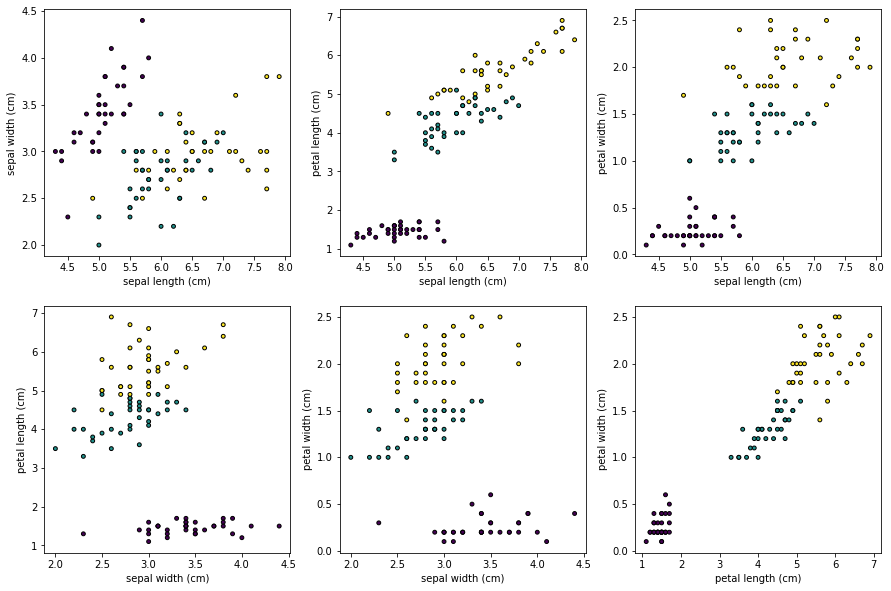

In [27]:
fig, axes = plt.subplots(nrows =2, ncols=3, figsize=(15,10))

pair_combs = [
    [0, 1], [0, 2], [0, 3], [1 ,2], [1, 3], [2, 3]
]

for idx, pair in enumerate(pair_combs):
  x, y = pair
  ax = axes[idx//3, idx%3]
  ax.scatter(
      x=train_data[:,x], y=train_data[:,y], c=train_target, edgecolor = "black", s =15
  )
  ax.set_xlabel(iris["feature_names"][x])
  ax.set_ylabel(iris["feature_names"][y])

2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

gini_tree = DecisionTreeClassifier()

2.1 학습

In [29]:
gini_tree.fit(train_data, train_target)

DecisionTreeClassifier()

[Text(0.4, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.625, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.375, 'petal length (cm) <= 5.35\ngini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

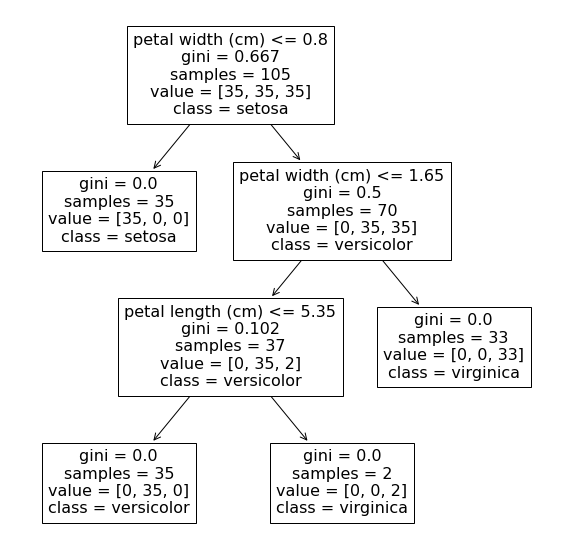

In [31]:
plt.figure(figsize = (10,10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names = iris["target_names"])

2.2 Arguments

DevisionTreeClassifier에서 주로 탐색하는 argument들은 다음과 같음

- criterion
 - 어떤 정보 이득을 기준으로 데이터를 나눌지 정함
 -'gini', 'entropy'

- max_depth
 - 나무의 최대 깊이 정함

- min_samples_split
 - 노드가 나눠질 수 있는 최소 데이터 개수를 정함

2.2.1 max_depth

[Text(0.5, 0.75, 'petal length (cm) <= 2.5\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor')]

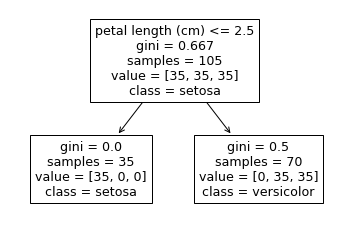

In [32]:
depth_1_tree = DecisionTreeClassifier(max_depth=1)
depth_1_tree.fit(train_data, train_target)

plot_tree(depth_1_tree, feature_names = iris["feature_names"], class_names=iris["target_names"])

2.2.2 min_sample_split

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.102\nsamples = 37\nvalue = [0, 35, 2]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]\nclass = virginica')]

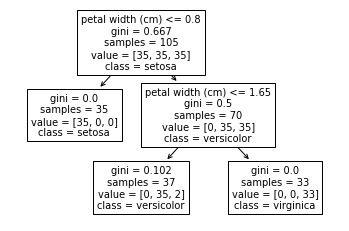

In [34]:
sample_50_tree = DecisionTreeClassifier(min_samples_split=50)
sample_50_tree.fit(train_data, train_target)

plot_tree(sample_50_tree, feature_names=iris["feature_names"], class_names=iris["target_names"])

2.2.3 criterion

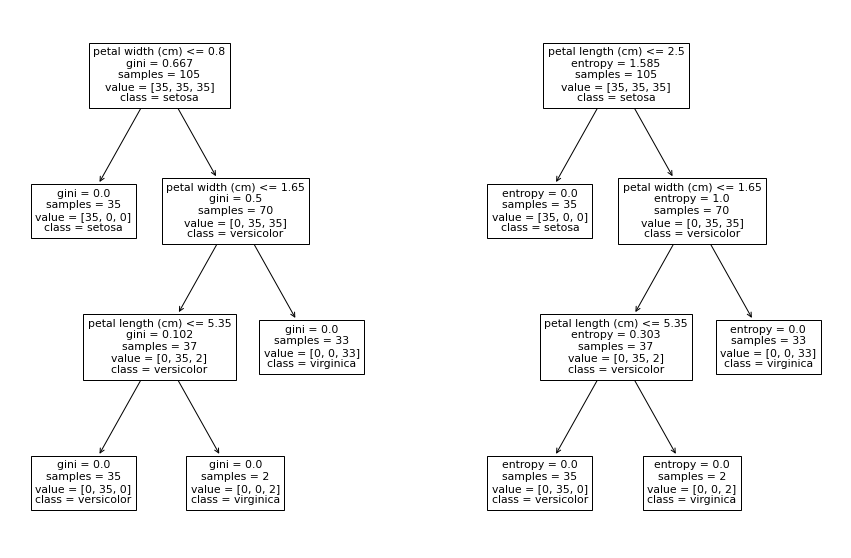

In [37]:
entropy_tree = DecisionTreeClassifier(criterion="entropy")
entropy_tree.fit(train_data, train_target)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
plot_tree(gini_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[0])
plot_tree(entropy_tree, feature_names=iris["feature_names"], class_names=iris["target_names"], ax=axes[1])
plt.show()

2.3 예측

In [38]:
trees = [
    ['gini_tree', gini_tree],
    ['entropy_tree', entropy_tree],
    ['depth = 1 tree', depth_1_tree],
    ['sample=50 tree', sample_50_tree]
]

In [39]:
train_preds = []
test_preds = []
for tree_name, tree in trees:
  train_pred = tree.predict(train_data)
  test_pred = tree.predict(test_data)
  train_preds += [train_pred]
  test_preds += [test_pred]

2.3 평가하기

In [41]:
from sklearn.metrics import accuracy_score

In [43]:
for idx, (tree_name, tree) in enumerate(trees):
  train_acc = accuracy_score(train_target, train_preds[idx])
  test_acc = accuracy_score(test_target, test_preds[idx])
  print(tree_name)
  print("\t", f"train accuracy is{train_acc:.2f}")
  print("\t", f"test accuracy is{test_acc:.2f}")

gini_tree
	 train accuracy is1.00
	 test accuracy is0.91
entropy_tree
	 train accuracy is1.00
	 test accuracy is0.91
depth = 1 tree
	 train accuracy is0.67
	 test accuracy is0.67
sample=50 tree
	 train accuracy is0.98
	 test accuracy is0.91


2.4 Feature Importance

In [44]:
gini_tree.feature_importances_

array([0.        , 0.        , 0.05405405, 0.94594595])

In [45]:
gini_feature_importance = pd.Series(gini_tree.feature_importances_, index = iris["feature_names"])

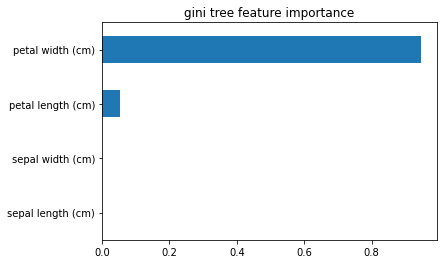

In [46]:
gini_feature_importance.plot(kind='barh', title='gini tree feature importance')

In [47]:
sample_50_feature_importance = pd.Series(
    sample_50_tree.feature_importances_,
    index=iris["feature_names"]
)

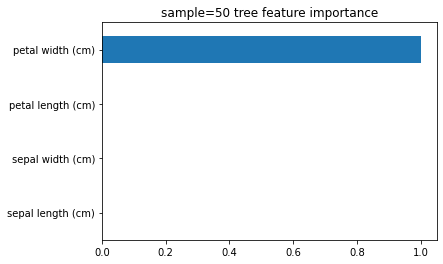

In [48]:
sample_50_feature_importance.plot(kind='barh', title="sample=50 tree feature importance")

3. 시각화

In [62]:
def plot_decision_boundary(pair_data, pair_tree, ax):
  x_min, x_max = pair_data[:,0].min() - 1, pair_data[:,0].max()+1
  y_min, y_max = pair_data[:,1].min() - 1, pair_data[:,1].max() +1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  
  Z = pair_tree.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  # Plot the training points
  for i, color in zip(range(3), 'ryb'):
    idx = np.where(train_target == i)
    ax.scatter(pair_data[idx,0], pair_data[idx, 1], c=color, label=iris["target_names"][i],
               cmap=plt.cm.RdYlBu, edgecolor="black", s=15)
    return ax

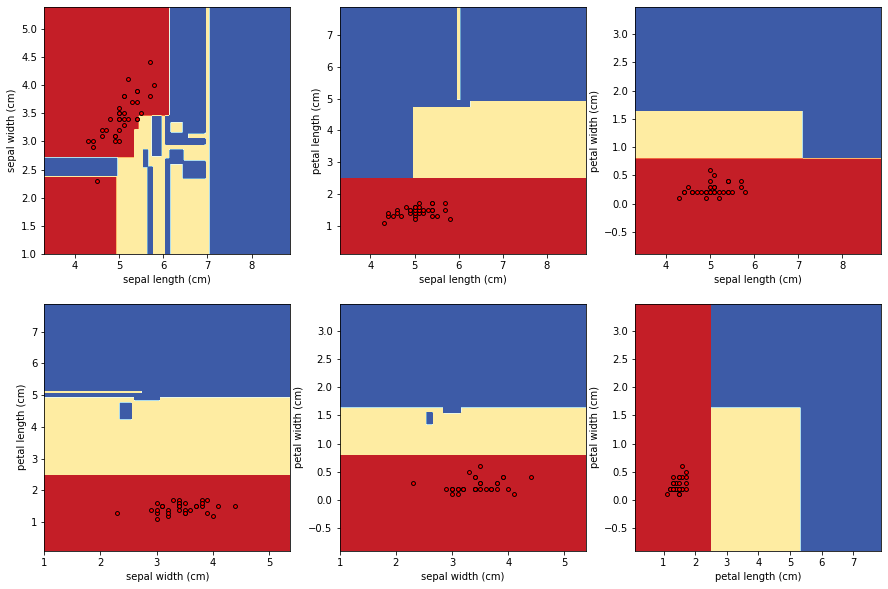

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

pair_combs = [
    [0,1], [0,2], [0,3], [1,2], [1,3], [2,3]
]
for idx, pair in enumerate(pair_combs):
  x,y = pair
  pair_data = train_data[:,pair]
  pair_tree = DecisionTreeClassifier().fit(pair_data, train_target)

  ax = axes[idx//3, idx%3]
  ax = plot_decision_boundary(pair_data, pair_tree, ax)
  ax.set_xlabel(iris["feature_names"][x])
  ax.set_ylabel(iris["feature_names"][y])